# 2. Gates


In [6]:
import pennylane as qml
from pennylane import numpy as np
#import qiskit
#from qiskit.quantum_info import Statevector

In [3]:
# Etat de Bell
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)

def circuit():

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])

    return qml.state()

# 3. State Preparation

In [4]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def psi_moins():
 
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    return qml.state()

@qml.qnode(dev)
def phi_plus():

  qml.Hadamard(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.PauliX(wires = 0)
  return qml.state()

@qml.qnode(dev)
def phi_moins():

  qml.Hadamard(wires = 0)
  qml.CNOT(wires = [0,1])
  qml.Z(wires = 0)
  qml.X(wires = 1)
  return qml.state()

#modifier avec la fonction pour visualiser l'état résultant
#Statevector(phi_plus()).draw('latex')

In [2]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def prepare_with_gate():
  qml.RX(np.pi/3, wires = 0)
  return qml.state()

state = np.array([np.sqrt(3)/2, -0.5j])

@qml.qnode(dev)
def prepare_with_StatePrep(state):
  qml.StatePrep(state=state, wires=0)
  return qml.state()

#Statevector(prepare_with_StatePrep(state)).draw('latex')

<IPython.core.display.Latex object>

# Week 1 review

In [3]:
dev = qml.device("default.qubit", wires = 3)
@qml.qnode(dev)
def circuit(theta, phi):
    qml.Hadamard(wires = 0)
    qml.RX(theta, wires = 1)
    qml.CNOT(wires = [1,2])
    qml.RY(phi, wires = 1)
    return qml.state()

# 4. Measurements

In [ ]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():

    qml.Hadamard(wires = 0)
    qml.Z(wires = 0)

    return qml.expval(qml.Z(wires = 0))
    
print(circuit())

In [5]:
#Adapted from the PennyLane Codebook I.10.2
results = []

n_shots = [1, 10, 100, 1000, 10000] #YOUR CODE HERE #Add different shot numbers to this array
for n in n_shots:
    dev = qml.device("default.qubit", wires = 0, shots = n)#YOUR CODE HERE# #define your device here$
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires = 0)
        qml.Z(wires = 0)
        return qml.expval(qml.Z(wires = 0))
    results.append(circuit())

print(results)

# Running jobs on MonarQ

In [ ]:
#The four-qubit GHZ state
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.CNOT(wires = [2,3])
    return qml.counts() #return qml.counts() since the goal is to run this on real quantum 

#The four-qubit GHZ state, paying attention the geometry of the QPU
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 4) #In Python, index starts at 0 so wire 4 = qubit 5 on the QPU plot
    qml.CNOT(wires = [4,0])
    qml.CNOT(wires = [4,1])
    qml.CNOT(wires = [4,8])
    return qml.counts() #return qml.counts() since the goal is to run this on real quantum hardware

# Depth reduction

In [14]:
dev = qml.device("default.qubit", wires = 2)
@qml.qnode(dev)
def Z_gate():
    #some arbitrary rotations to make the final state more interesting
    qml.RX(np.pi, wires = 0) 
    qml.RY(np.pi/3, wires = 0) 
    qml.Z(wires = 0)
    return qml.state()#return the state

@qml.qnode(dev)
def HXH_gate():
    #some arbitrary rotations to make the final state more interesting
    qml.RX(np.pi, wires = 0) 
    qml.RY(np.pi/3, wires = 0) 
    qml.Hadamard(wires = 0)
    qml.X(wires = 0)
    qml.Hadamard(wires = 0)
    return qml.state() #return the state

(<Figure size 1100x900 with 1 Axes>, <Axes: >)

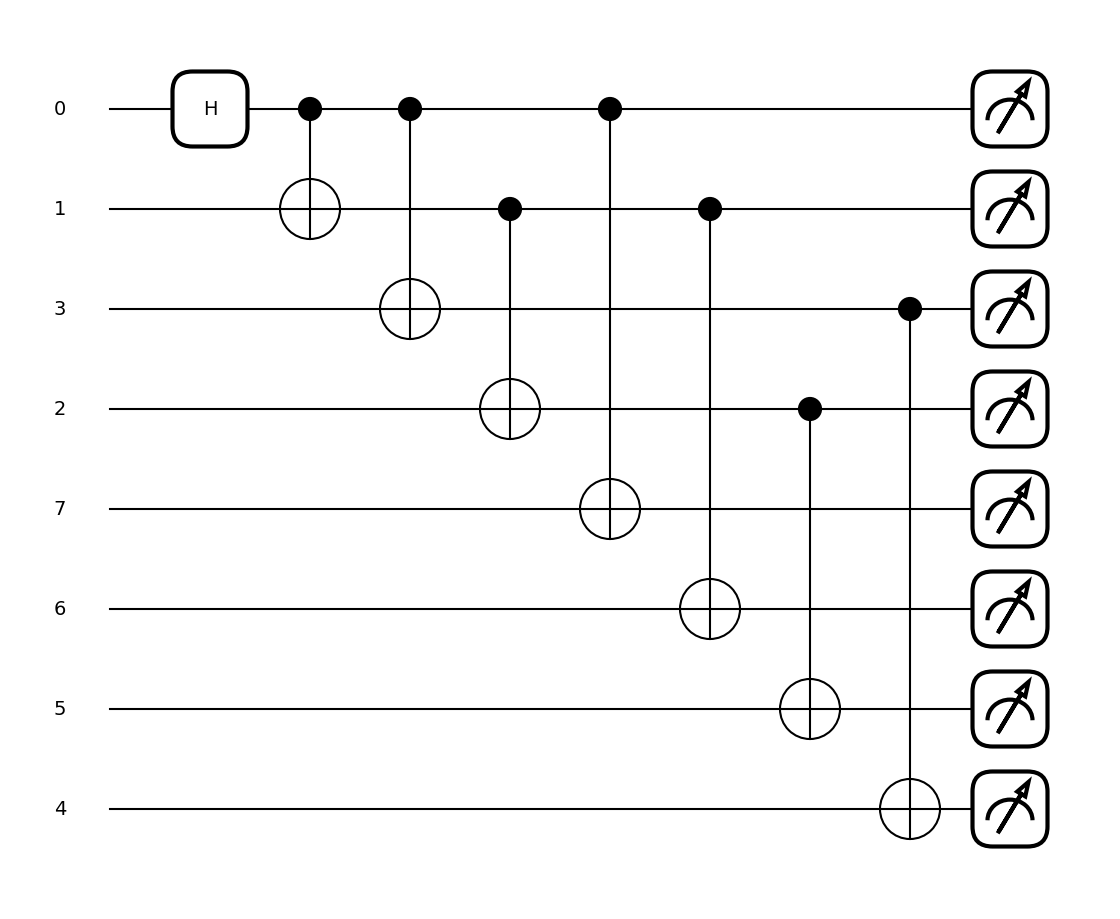

In [17]:
#The depth of the initial circuit is 8 
#The depth of the reduced circuit is 4
#There are other ways to arrange the gates that lead to the same reduced depth of 4
n_qubits = 8
@qml.qnode(dev)
def reduced_circuit(n_qubits):
    qml.Hadamard(wires = 0)
    for n in [2, 4, 8]:
      for i in range(n//2):
        qml.CNOT(wires = [i, n - i - 1])
    return qml.state()

qml.draw_mpl(reduced_circuit)(n_qubits)